# Análisis de Sentimiento (Reseñas de Películas)

**Importar las bibliotecas**

**Tensorflow y keras:** Usamos TensorFlow como marco principal para el aprendizaje profundo, y Keras (incluido en TensorFlow) nos proporciona una API sencilla para construir redes neuronales.

**imdb:** Este dataset viene predefinido en TensorFlow y contiene 50,000 reseñas de películas etiquetadas como positivas (1) o negativas (0).

**pad_sequences:** Herramienta para normalizar las longitudes de las reseñas (rellenando o cortando palabras) para que puedan ser procesadas por el modelo.

***Sequential: ***Clase que permite construir modelos capa por capa.

**Embedding, LSTM, Dense:** Componentes principales de nuestra red neuronal:

**Embedding:** Convierte palabras en vectores.

**LSTM:** Modelo recurrente para secuencias.

**Dense:** Capa completamente conectada.

**matplotlib.pyplot:** Biblioteca para visualizar datos y métricas.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


**Cargar y explorar el dataset**

**num_words**: Limitamos el vocabulario a las 10,000 palabras más comunes, lo que ayuda a reducir la complejidad y tamaño del modelo.

**imdb.load_data:** Cargamos los datos como dos pares: entrenamiento y prueba. Cada reseña es una lista de enteros (códigos de palabras), y cada etiqueta indica si la reseña es positiva o negativa.

**Estructura del dataset:**
X_train: Contiene las reseñas (listas de enteros).

y_train: Contiene las etiquetas (1 para positiva, 0 para negativa).

X_test y y_test: Se usan para evaluar el modelo.


**Ejemplo: **   Mostramos la primera reseña codificada y su etiqueta para entender la estructura.

In [2]:
# Cargar el dataset de IMDB
num_words = 10000  # Usaremos las 10,000 palabras más comunes
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Mostrar un ejemplo del dataset
print(f"Primera reseña codificada: {X_train[0]}")
print(f"Primera etiqueta (positiva=1, negativa=0): {y_train[0]}")

# Mostrar el tamaño de los datos
print(f"Número de ejemplos de entrenamiento: {len(X_train)}")
print(f"Número de ejemplos de prueba: {len(X_test)}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Primera reseña codificada: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5

**Preprocesamiento de datos**

**max_length:** Limitamos las reseñas a 100 palabras. Esto garantiza que todas tengan la misma longitud, necesario para los modelos de deep learning.

**pad_sequences:**

**padding='post':** Añade ceros al final si la reseña es más corta que 100 palabras.

**truncating='post':** Corta el exceso desde el final si la reseña es más larga.

**Resultado:** Después del preprocesamiento, todas las reseñas tienen exactamente 100 palabras, representadas como una lista de enteros.


In [3]:
# Longitud máxima de las secuencias (rellenaremos o cortaremos a esta longitud)
max_length = 100

# Rellenar las secuencias para que todas tengan la misma longitud
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

print(f"Primera reseña después del padding: {X_train[0]}")


Primera reseña después del padding: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16]


**Crear el modelo**

**Capa Embedding:**
input_dim=num_words: Tamaño del vocabulario (10,000 palabras).

**output_dim=32:** Cada palabra se convierte en un vector de 32 dimensiones.

**input_length=max_length:** Longitud fija de las secuencias (100 palabras).

**Capa LSTM:**

**64:** Número de unidades de memoria. La LSTM procesa las palabras secuencialmente para capturar el contexto.

**activation='relu':** Función de activación para mejorar el rendimiento.

**Capa Dense:**

**1: **Salida binaria.

**sigmoid:** Genera un valor entre 0 y 1 para la predicción.

**Compilación del modelo:**

**adam:** Optimizador eficiente para deep learning.

**binary_crossentropy:** Métrica de pérdida para problemas binarios.

**accuracy:** Mide la precisión del modelo.

In [4]:
# Crear el modelo
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=max_length),  # Capa de embeddings
    LSTM(64, activation='relu'),  # Capa LSTM para capturar patrones secuenciales
    Dense(1, activation='sigmoid')  # Salida binaria: positiva o negativa
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Entrenar el modelo**

**epochs=5:** El modelo pasa por todos los datos de entrenamiento 5 veces.

**batch_size=32:** Procesa las muestras en lotes de 32 para optimizar el uso de memoria.

**validation_split=0.2:** Reserva el 20% de los datos de entrenamiento para validar el modelo.

**history:** Guarda métricas de entrenamiento y validación, como precisión y pérdida, para analizarlas después.


In [9]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=25,  # Puedes aumentar a 10 si tienes tiempo
    batch_size=32,
    validation_split=0.2  # Usar el 20% de los datos de entrenamiento para validación
)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7405 - loss: 0.5596 - val_accuracy: 0.6034 - val_loss: 0.6784
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7417 - loss: 0.5474 - val_accuracy: 0.6056 - val_loss: 0.6867
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7543 - loss: 0.5324 - val_accuracy: 0.6038 - val_loss: 0.6966
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7344 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5011 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4970 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4995 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4969 - loss: nan - val_accuracy: 0.5062 - val_los

**Evaluar el modelo**

**model.evaluate:** Evalúa el modelo en los datos de prueba, devolviendo la pérdida y la precisión.

**Resultados:** Estos valores muestran qué tan bien generaliza el modelo a datos no vistos.


In [10]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5073 - loss: nan
Pérdida en el conjunto de prueba: nan
Precisión en el conjunto de prueba: 0.5


**Visualizar los resultados**

**Gráfica de precisión:** Compara la precisión en entrenamiento y validación por época.

**Gráfica de pérdida:** Muestra cómo la pérdida cambia en cada época.

**Propósito:** Identificar sobreajuste o bajo rendimiento.


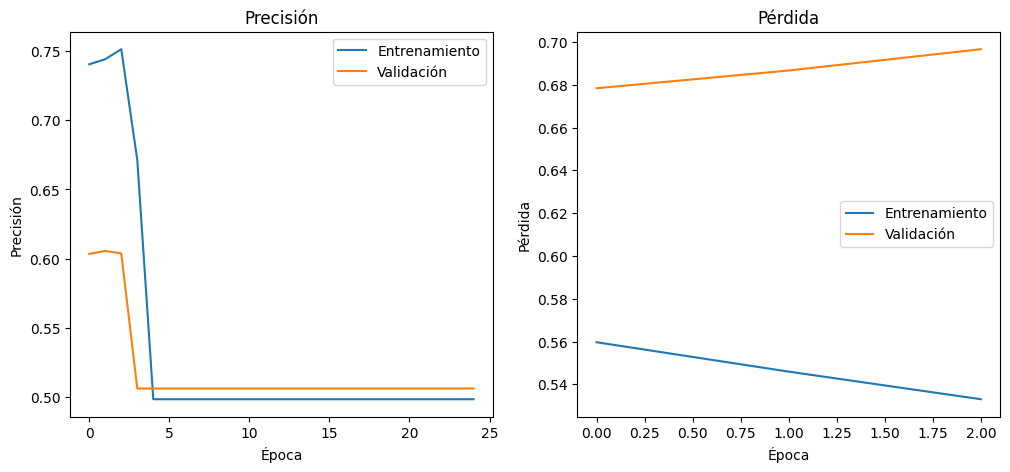

In [13]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


**Probar predicciones**

**Decodificación:** Convierte las palabras codificadas en texto legible.

**Predicción:** Genera un valor entre 0 y 1 para clasificar como negativa o positiva.


In [12]:
# Convertir una reseña en texto legible (opcional)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Ejemplo: Decodificar una reseña y predecir
sample_review = X_test[0]
decoded_review = decode_review(X_test[0])
print(f"Reseña decodificada: {decoded_review}")

prediction = model.predict(sample_review.reshape(1, -1))
print(f"Predicción (positiva=1, negativa=0): {prediction[0][0]}")


Reseña decodificada: ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicción (positiva=1, negativa=0): nan
